In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import glob

In [4]:
files = glob.glob('/home/mehul/Documents/lectures/python/data/weather_data/weather_data_set_*')
print files

['/home/mehul/Documents/lectures/python/data/weather_data/weather_data_set_1900', '/home/mehul/Documents/lectures/python/data/weather_data/weather_data_set_1901']


In [7]:
column_names = ['station','year','datemonth','hourminute','temperature']
d = pd.concat([pd.read_table(file, delimiter='|', header=None, names=column_names) for file in files],
             ignore_index=True)
d

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [8]:
c_d = d.dropna()
c_d

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


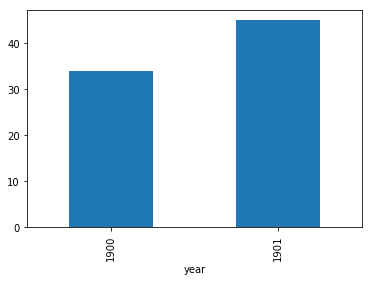

In [12]:
g_d = c_d.groupby('year')
max_yearly = g_d['temperature'].max()
max_yearly.plot(kind='bar')
plt.show()

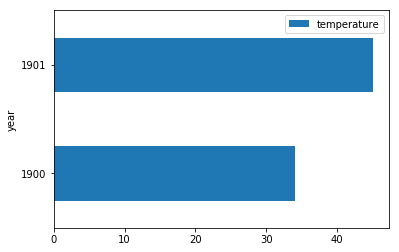

In [15]:
p_c_d = c_d.pivot_table('temperature', aggfunc=np.max, index='year')
p_c_d.plot(kind='barh')
plt.show()

In [17]:
file2_path = '/home/mehul/Documents/lectures/python/data/weather_data_company_xyz/weather_data_set'
d2 = pd.read_csv(file2_path, header=None, names=['year','temperature'])
d2

,year,temperature
0,1900,25.0
1,1900,24.0
2,1900,21.0
3,1900,29.0
4,1901,NaN
5,1901,23.0
6,1901,21.0
7,1900,36.0
8,1901,25.0


In [19]:
c_d2 = d2.dropna()
c_d2

,year,temperature
0,1900,25.0
1,1900,24.0
2,1900,21.0
3,1900,29.0
5,1901,23.0
6,1901,21.0
7,1900,36.0
8,1901,25.0


In [22]:
c_d1 = c_d[['year','temperature']]
c_d1

,year,temperature
0,1900,23.0
1,1900,24.0
2,1900,26.0
3,1900,24.0
4,1900,30.0
5,1900,29.0
6,1900,34.0
7,1900,23.0
8,1901,24.0
9,1901,45.0


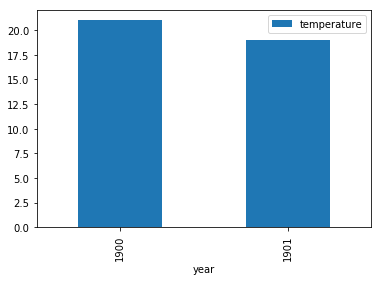

In [26]:
data = pd.concat([c_d1,c_d2], ignore_index=True)
min_temp_yearly = data.pivot_table('temperature', aggfunc=np.min, index='year')
min_temp_yearly.plot(kind='bar')
plt.show()